# Tutorial 5: Introduction to Machine Learning with scikit-learn

In this tutorial, we will go through the elements of machine learning and be familiar with basic pipeline of it with scikit-learn: data preparation -> model specification and training -> hyperparameter tuning.

## 1. Review the elements of machine learning

### Mathematical Notations

#### Data
- Training dataset $(x_i, y_i)_{i=1}^{n_{train}}$, $x_i \in \mathfrak{X} \subset \mathbb{R}^d$, $y_i \in \mathfrak{Y}$ where $\mathfrak{Y}$ usually be $\mathbb{R}$ (regression) or $\{1,\cdots,C\}$ (classification).
- Testing dataset $(x_j)_{j=1}^{n_{test}}$.

#### Training
- Model parametrized by $\theta$: $f_{\theta}: \mathfrak{X} \rightarrow \mathfrak{Y}$.
- Loss function: $l: \mathfrak{Y} \times \mathfrak{Y} \rightarrow \mathbb{R}_+$.
- Empirical Risk Minimization (model training):

$$
    \widehat{f}_{\theta} = \arg\min_{f_{\theta}} \frac{1}{n} \sum_{i=1}^{n_{train}} l(f_{\theta}(x_i), y_i).
$$

- Hyperparameter Tuning
- optimization algorithms, model selection, ...

#### Testing
- Use trained model to make prediction


### Common steps in a ML workflow
1. Load and understand the data
2. Preprocess / clean the data
3. Split data into train & test sets
4. Choose and train a model
5. Validate/evaluate the model
6. Improve the model (if necessary)


## 2. Recogonizing hand-written digits

ref: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

- Load `digits` dataset: 8x8 pixel images of digits (greyscale)
- Train test split
- Evaluated by various metrics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split


In [ ]:
digits = datasets.load_digits()


In [ ]:
print(f"feature shape: {digits.images.shape}")
print(f"flatten feature shape: {digits.data.shape}")
print(f"label shape: {digits.target.shape}")

print(f"label set: {np.unique(digits.target)}")

feature shape: (1797, 8, 8)
flatten feature shape: (1797, 64)
label shape: (1797,)
label set: [0 1 2 3 4 5 6 7 8 9]


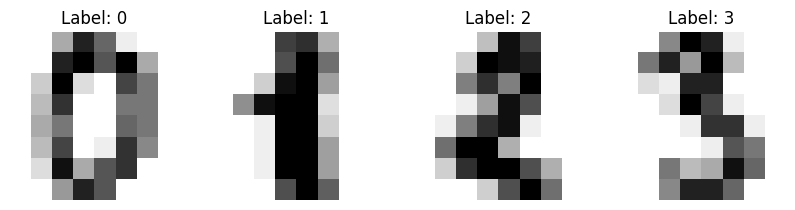

In [ ]:
# Visualize some digits
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("Label: %i" % label)


In [ ]:
# Split data into training and test sets

n_samples = len(digits.images)
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, shuffle=False
)


In [ ]:
# Train a SVM model
clf_svm = svm.SVC(gamma=0.001)
clf_svm.fit(X_train, y_train)

# Predict using the SVM model
prediction_svm = clf_svm.predict(X_test)

# Evaluate the predictions
print("SVM Classification report:\n", metrics.classification_report(y_test, prediction_svm))


SVM Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



### Evaluation metrics in classification

1. Accuracy:
$$
    \frac{1}{n_{test}} \sum_{j=1}^{n_{test}} I(\widehat{y}_j = y_j)
$$

Accuracy can not fully reflect the model performance when the class distribution is imbalanced.

For example:
- Imbalance: Suppose you're building an image classifier to identify animal species with three classes:
    - Class A: 9500 images (majority)
    - Class B: 400 images
    - Class C: 100 images
- Consider a classifier simply labels every image as "Class A." Then the accuracy is $\frac{9500}{9500+400+100} = 0.95$.
- If Classes B and C are rare but important (e.g., dangerous animal species), the accuracy gives a false sense of confidence.

Hence, we also consider the following metrics, which are based on the confusion matrix (consider binary classification here):
- True Positive (TP): number of positive samples correctly predicted as positive $\sum_{j} I(\widehat{y}_j = 1 \text{ and } y_j = 1)$
- True Negative (TN): number of negative samples correctly predicted as negative $\sum_{j} I(\widehat{y}_j = 0 \text{ and } y_j = 0)$
- False Positive (FP): number of negative samples incorrectly predicted as positive $\sum_{j} I(\widehat{y}_j = 1 \text{ and } y_j = 0)$
- False Negative (FN): number of positive samples incorrectly predicted as negative $\sum_{j} I(\widehat{y}_j = 0 \text{ and } y_j = 1)$

For multi-class classification, we can compute these metrics for each class in a one-vs-all manner.
- $\text{TP}_{c} = \sum_{j} I(\widehat{y}_j = c \text{ and } y_j = c)$
- $\text{TN}_{c} = \sum_{j} I(\widehat{y}_j \neq c \text{ and } y_j \neq c)$
- $\text{FP}_{c} = \sum_{j} I(\widehat{y}_j = c \text{ and } y_j \neq c)$
- $\text{FN}_{c} = \sum_{j} I(\widehat{y}_j \neq c \text{ and } y_j = c)$

2. Precision:  
$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} = \frac{\text{TP}}{\text{Predicted Positives}}
$$
proportion of predicted positives that are actually correct (true positives over all predicted positives).

3. Recall (Sensitivity):  
$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} = \frac{\text{TP}}{\text{Actual Positives}}
$$
proportion of actual positives that are correctly identified (true positives over all actual positives).

When to prefer precision over recall:
- Example: Spam Detection
- Goal: You want only real spam to end up in the spam folder.
- Why Precision Matters: If non-spam (important) emails are incorrectly labeled as spam (false positives), users may miss crucial emails—very bad!
- Interpretation: Higher precision = fewer false alarms.

When to prefer recall over precision:
- Example: Disease Screening (e.g., HIV, COVID-19, Severe Disease)
- Goal: Identify as many sick patients as possible.
- Why Recall Matters: Missing a sick person (false negative) is dangerous, because they remain untreated and may spread the disease.
- Preferred Metric: High recall means you catch nearly all of the true cases (even if you flag some healthy people; they can undergo further testing).

One simple way to trade-off precision and recall is to use a threshold for the predicted probabilities: Say we have a model that outputs a probability $p$ for each sample, and we set a threshold $\tau$ to decide whether to predict 1 or 0 by $\widehat{y}_j = I(p_j \geq \tau)$. The higher $\tau$, the higher the precision, but the lower the recall.

4. F1-score:  
$$
F_1 = 2\cdot\frac{\text{Precision}\cdot\text{Recall}}{\text{Precision}+\text{Recall}}
= \frac{2\cdot\text{TP}}{2\text{TP} + \text{FP} + \text{FN}}
$$
the harmonic mean of precision and recall; balances the two (useful when class distribution is imbalanced).

**Takeaway: The performance of a ML model needs various evaluations and should depend on the context of the problem.**

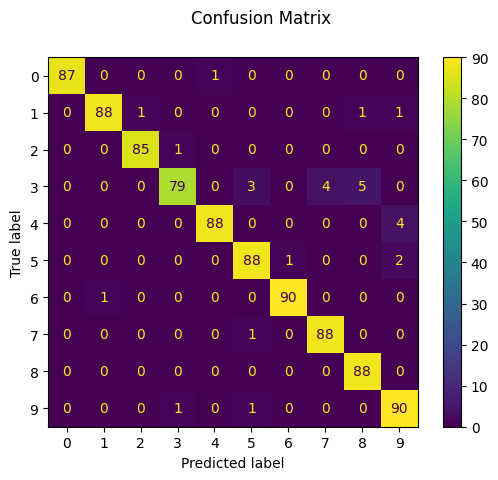

In [ ]:
# Plot confusion matrix of the true vs predicted labels
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, prediction_svm)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")


plt.show()


## 3. Titanic: survival prediction

kaggle competition: https://www.kaggle.com/competitions/titanic/overview

- use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
- passenger information: name, age, gender, socio-economic class, etc.

code ref: https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd


In [ ]:
DATA_DIR = "/content/drive/MyDrive/titanic"

train_df = pd.read_csv(os.path.join(DATA_DIR, "train.csv"))
test_df = pd.read_csv(os.path.join(DATA_DIR, "test.csv"))


### 3.1 Data Exploration

- Correlating: how well does each feature correlate with `Survival`

In [ ]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Field Description

| Variable   | Definition                                 | Key                                      |
|------------|--------------------------------------------|------------------------------------------|
| survival   | Survival                                   | 0 = No, 1 = Yes                          |
| pclass     | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                |
| sex        | Sex                                        |                                          |
| Age        | Age in years                               |                                          |
| sibsp      | # of siblings / spouses aboard the Titanic  |                                          |
| parch      | # of parents / children aboard the Titanic  |                                          |
| ticket     | Ticket number                              |                                          |
| fare       | Passenger fare                             |                                          |
| cabin      | Cabin number                               |                                          |
| embarked   | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

In [ ]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

#### Drop columns

By common sense reasoning:

- `Ticket number` and `Cabin number` are supposed to be not useful for prediction.
- `Name` contains the title like "Master", "Miss", "Mr", "Mrs", which maybe useful but a bit difficult to process, so we drop it for simplicity.

In [ ]:
train_df = train_df.drop(['Ticket', 'Cabin', 'Name'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin', 'Name'], axis=1)

#### Analyze Categorical Data

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).agg(['mean', 'count'])

Pclass  Survived      
              mean count
0      1  0.629630   216
1      2  0.472826   184
2      3  0.242363   491

In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).agg(['mean', 'count'])

Sex  Survived      
               mean count
0  female  0.742038   314
1    male  0.188908   577

#### Analyze Numeric Data

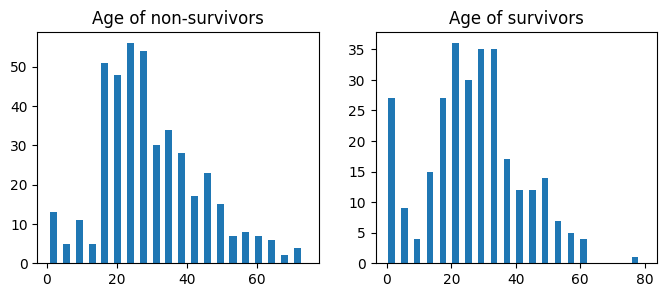

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

axes[0].set_title('Age of non-survivors')
axes[0].hist(train_df[train_df['Survived'] == 0]['Age'].dropna(), bins=20, width=2)
axes[1].set_title('Age of survivors')
axes[1].hist(train_df[train_df['Survived'] == 1]['Age'].dropna(), bins=20, width=2);

#### Feature Engineering

- Categorical variables: one-hot encoding
- Missing values: numeric -> mean, categorical -> mode (most frequent)
- Binning (discretization)

In [ ]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

/tmp/ipython-input-987560108.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [ ]:
mean_age = train_df['Age'].mean()
train_df.fillna({'Age': mean_age}, inplace=True)
test_df.fillna({'Age': mean_age}, inplace=True)

train_df.drop("AgeBand", axis=1, inplace=True)

for dataset in [train_df, test_df]:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1.0,1,0,7.2500,S
1,2,1,1,1,2.0,1,0,71.2833,C
2,3,1,3,1,1.0,0,0,7.9250,S
3,4,1,1,1,2.0,1,0,53.1000,S
4,5,0,3,0,2.0,0,0,8.0500,S


In [ ]:
freq_port = train_df.Embarked.dropna().mode()[0]

for dataset in [train_df, test_df]:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1.0,1,0,7.2500,0
1,2,1,1,1,2.0,1,0,71.2833,1
2,3,1,3,1,1.0,0,0,7.9250,0
3,4,1,1,1,2.0,1,0,53.1000,0
4,5,0,3,0,2.0,0,0,8.0500,0


In [ ]:
mean_fare = train_df['Fare'].mean()
train_df.fillna({"Fare": mean_fare}, inplace=True)
test_df.fillna({"Fare": mean_fare}, inplace=True)

for dataset in [train_df, test_df]:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)


### 3.2 Model Training

In [ ]:
X_train = train_df.drop(["PassengerId", "Survived"], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

acc_log

79.69

In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)

acc_svc

79.35

In [ ]:
param_grid = {
    'C': [0.1, 1],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01],  # Kernel coefficient
    'kernel': ['rbf', 'linear'],  # Kernel type
}

grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # You can change this to other metrics like 'f1', 'precision', 'recall'
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Print progress
)

print("Starting grid search...")
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print("\nBest parameters found:")
print(grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


Starting grid search...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best parameters found:
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.8182


In [ ]:
best_svc = SVC(**grid_search.best_params_)
best_svc.fit(X_train, Y_train)

y_pred = best_svc.predict(X_test)
